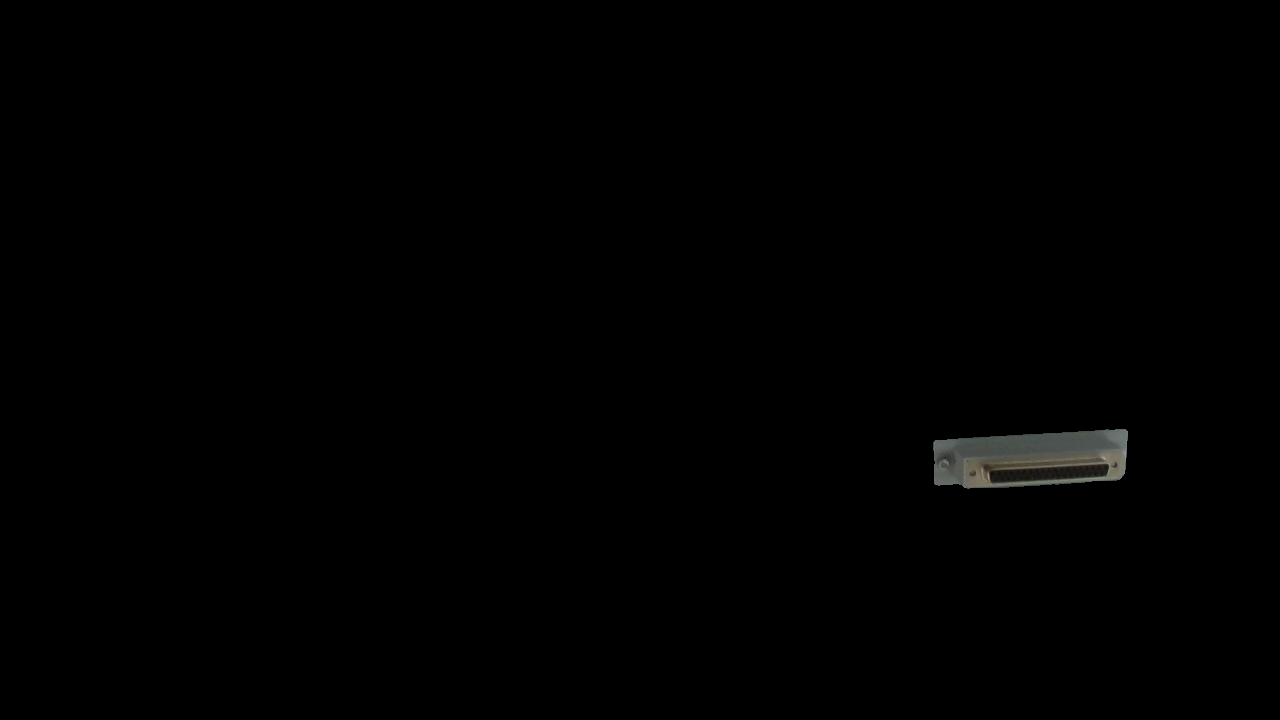

Mean for entire image (RGB): [129.54471582 132.19551945 129.56708504]
Mean for masked region (RGB): [78.52823641 80.58486894 73.60686693]


In [3]:
from PIL import Image
import os
import numpy as np

# Set the paths to the directories
base_dir = "dataset/mini_testdatensatz"
train_dir = os.path.join(base_dir, "train")
seg_dir = os.path.join(base_dir, "segmentation_images")

# Initialize variables for the means of the entire image and masked region
mean_image = np.zeros((3,))
mean_masked = np.zeros((3,))
num_masked_pixels = 0
i = 0
color_list = [[],[],[],[]]

# Loop through each image in the train folder
for filename in os.listdir(train_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
    
        # Open the image and its corresponding segmentation mask
        img_path = os.path.join(train_dir, filename)
        seg_path = os.path.join(seg_dir, filename)
        img = Image.open(img_path)
        seg = Image.open(seg_path)

        # Convert the segmentation mask to a binary numpy array
        seg_array = np.array(seg)
        seg_array[seg_array > 0] = 1
        seg_array = seg_array[:, :, np.newaxis]  # Add an extra axis to match the image array

        # Apply the segmentation mask to the image
        img_array = np.array(img)
        masked_array = img_array * seg_array

        # Calculate the mean for the entire image and the masked region
        mean_image += np.mean(img_array, axis=(0, 1))
        mean_masked += np.sum(masked_array, axis=(0, 1))
        num_masked_pixels += np.sum(seg_array)

        color_list[0].append(filename)
        color_list[1].append(mean_masked[0]/num_masked_pixels)
        color_list[2].append(mean_masked[1]/num_masked_pixels)
        color_list[3].append(mean_masked[2]/num_masked_pixels)

        # Show the cut-out image
        img_cut = Image.fromarray(masked_array.astype(np.uint8))
        if i == 0:
        # Show the cut-out image
            display(img_cut)
            i += 1

# Calculate the means for the entire image and the masked region
mean_image /= len(os.listdir(train_dir))
mean_masked /= num_masked_pixels

# Print the results
print("Mean for entire image (RGB):", mean_image)
print("Mean for masked region (RGB):", mean_masked)
